<a href="https://colab.research.google.com/github/MuthuDeep/MUTHUKUMARAN/blob/main/egde_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

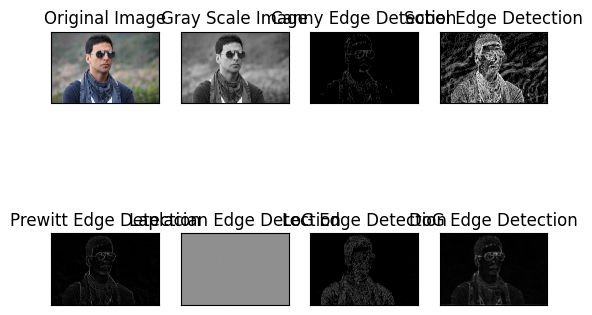

In [1]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Read the image
img_path = "/content/hero.jpg"
img = cv2.imread(img_path)
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Canny Edge Detection
img_canny = cv2.Canny(img, 100, 200)

# Sobel Edge Detection
img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_8U, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img_gaussian, cv2.CV_8U, 0, 1, ksize=5)
img_sobel = img_sobelx + img_sobely

# Prewitt Edge Detection
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

# Laplacian (Second Order Derivation)
laplacian = cv2.Laplacian(img_gaussian, cv2.CV_64F)

# LoG (Laplacian of Gaussian)
import scipy.ndimage as nd

LoG = nd.gaussian_laplace(gray, 2)
thres = np.absolute(LoG).mean() * 0.75
output = np.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if p > 0:
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if (maxP - minP) > thres and zeroCross:
            output[y, x] = 1

# DoG (Difference of Gaussian)
A = np.array([[0, 0, -1, -1, -1, 0, 0],
              [0, -2, -3, -3, -3, -2, 0],
              [-1, -3, 5, 5, 5, -3, -1],
              [-1, -3, 5, 16, 5, -3, -1],
              [-1, -3, 5, 5, 5, -3, -1],
              [0, -2, -3, -3, -3, -2, 0],
              [0, 0, -1, -1, -1, 0, 0]], dtype=np.float32)

ratio = gray.shape[0] / 500.0
new_width = int(gray.shape[1] / ratio)
nimg = cv2.resize(gray, (new_width, 500))
I1 = signal.convolve2d(nimg, A, mode='same')
I1 = np.absolute(I1)
I1 = (I1 - np.min(I1)) / float(np.max(I1) - np.min(I1))
I2 = cv2.GaussianBlur(I1, (5, 5), 0)

# Plotting
plt.subplot(2, 4, 1), plt.imshow(original_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 2), plt.imshow(gray, cmap='gray')
plt.title('Gray Scale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 3), plt.imshow(img_canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 4), plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 5), plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 6), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 7), plt.imshow(output, cmap='gray')
plt.title('LoG Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 8), plt.imshow(I2, cmap='gray')
plt.title('DoG Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()